<a href="https://colab.research.google.com/github/LuisST-2000/Essential-python-analytics-and-webcraping-knowledge/blob/main/Analysis_Data_Football.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Instalamos e importamos las librerías utilizadas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
goalscores = pd.read_csv('/content/drive/MyDrive/Data_Football/goalscorers.csv')
results = pd.read_csv('/content/drive/MyDrive/Data_Football/results.csv')
shootouts = pd.read_csv('/content/drive/MyDrive/Data_Football/shootouts.csv')
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [4]:
goalscores.head()

,date,home_team,away_team,team,scorer,minute,own_goal,penalty
0,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,44.0,False,False
1,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,55.0,False,False
2,1916-07-02,Chile,Uruguay,Uruguay,Isabelino Gradín,70.0,False,False
3,1916-07-02,Chile,Uruguay,Uruguay,José Piendibene,75.0,False,False
4,1916-07-06,Argentina,Chile,Argentina,Alberto Ohaco,2.0,False,False


In [5]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [6]:
shootouts.head()

,date,home_team,away_team,winner
0,1967-08-22,India,Taiwan,Taiwan
1,1971-11-14,South Korea,Vietnam Republic,South Korea
2,1972-05-07,South Korea,Iraq,Iraq
3,1972-05-17,Thailand,South Korea,South Korea
4,1972-05-19,Thailand,Cambodia,Thailand


1. Limpieza y Transformacion de Datos

En este caso como voy a trabajar con datos de las copas mundiales, voy a agregar columna, remover datos nulos y unir datasets distintos con datos que se presentan en común en común.

In this case, as I am going to work with world cups data, I am going to add columns, remove null data and join different datasets with data that are presented in common.

In [7]:
# Selecciono la data relacionada a la Copa Mundial
# Select the data related to the World Cup.
worldCups = results[results.tournament == 'FIFA World Cup']
worldCups

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
1311,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True
1312,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True
1313,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True
1314,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True
1315,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True
...,...,...,...,...,...,...,...,...,...
44349,2022-12-10,England,France,1,2,FIFA World Cup,Al Khor,Qatar,True
44351,2022-12-13,Argentina,Croatia,3,0,FIFA World Cup,Lusail,Qatar,True
44352,2022-12-14,France,Morocco,2,0,FIFA World Cup,Al Khor,Qatar,True
44356,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup,Al Rayyan,Qatar,True


In [8]:
# Selecciono la data que ganó como local
# Select the data that won at home
winner_home_team = worldCups["home_team"].where(worldCups['home_score'] > worldCups["away_score"])

# Creamos una nueva columna llamada winner y asignamos el nombre del equipo ganador
# Create a new column called winner and assign the winning team name
worldCups = worldCups.assign(winner = winner_home_team)
worldCups


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winner
1311,1930-07-13,Belgium,United States,0,3,FIFA World Cup,Montevideo,Uruguay,True,NaN
1312,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,France
1313,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,NaN
1314,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,NaN
1315,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,Argentina
...,...,...,...,...,...,...,...,...,...,...
44349,2022-12-10,England,France,1,2,FIFA World Cup,Al Khor,Qatar,True,NaN
44351,2022-12-13,Argentina,Croatia,3,0,FIFA World Cup,Lusail,Qatar,True,Argentina
44352,2022-12-14,France,Morocco,2,0,FIFA World Cup,Al Khor,Qatar,True,France
44356,2022-12-17,Croatia,Morocco,2,1,FIFA World Cup,Al Rayyan,Qatar,True,Croatia


In [9]:
# Selecciono la data que ganó como visitante
# Select the data that won as visitor
winner_away_team = worldCups["away_team"].where(worldCups['home_score'] < worldCups["away_score"])

# Asigno el nombre del equipo ganador a la columna winner
# Assign the name of the winning team to the winner column.
worldCups['winner'].fillna(winner_away_team, inplace = True)

# Elimino la columna neutral, tournament ya que están demás
# Eiminate the neutral column, tournament since they are too many.
worldCups = worldCups.drop(['neutral','tournament'], axis = 1)

worldCups


,date,home_team,away_team,home_score,away_score,city,country,winner
1311,1930-07-13,Belgium,United States,0,3,Montevideo,Uruguay,United States
1312,1930-07-13,France,Mexico,4,1,Montevideo,Uruguay,France
1313,1930-07-14,Brazil,Yugoslavia,1,2,Montevideo,Uruguay,Yugoslavia
1314,1930-07-14,Peru,Romania,1,3,Montevideo,Uruguay,Romania
1315,1930-07-15,Argentina,France,1,0,Montevideo,Uruguay,Argentina
...,...,...,...,...,...,...,...,...
44349,2022-12-10,England,France,1,2,Al Khor,Qatar,France
44351,2022-12-13,Argentina,Croatia,3,0,Lusail,Qatar,Argentina
44352,2022-12-14,France,Morocco,2,0,Al Khor,Qatar,France
44356,2022-12-17,Croatia,Morocco,2,1,Al Rayyan,Qatar,Croatia


In [10]:
# Visualizo cuantos datos nulos hay y que columnas contienen estos datos
# Visualize how many null data there are and which columns contain this data
worldCups.isnull().sum()

date            0
home_team       0
away_team       0
home_score      0
away_score      0
city            0
country         0
winner        214
dtype: int64

Vemos que hay 214 valores nulos, esto se refiere a los partidos que han sido empatados. En este caso, uniré la data de results.csv(Actualmente worldCups) y shootouts.csv ya que hay partidos que se ganan por penales.

Podemos visualizar que al unir los dataframes nos agrega las columnas winner_x y winner_y respectivamente.

We see that there are 214 null values, this refers to matches that have been tied. In this case, I will merge the data from results.csv(currently worldCups) and shootouts.csv since there are matches that are won by penalties.

We can see that joining the dataframes adds the columns winner_x and winner_y respectively.

In [11]:
# Merge results.csv and shootouts.csv dataframes
# Unimos la data de results.csv(Actualmente worldCups) y shootouts.csv
merged_data = pd.merge(worldCups, shootouts, on=['date', 'home_team', 'away_team'], how='left')
merged_data.winner_x.fillna(merged_data.winner_y, inplace = True)
merged_data = merged_data.drop('winner_y', axis = 1)
merged_data = merged_data.rename(columns = {'winner_x':'winner'})


Verificamos los valores nulos actuales y asignamos empate a esos valores.

We check the current null values and assign tie to those values.

In [12]:
merged_data.isnull().sum()

date            0
home_team       0
away_team       0
home_score      0
away_score      0
city            0
country         0
winner        179
dtype: int64

In [13]:
merged_data.winner.fillna('Tie', inplace = True)

# Visualización de datos
# 1. Top 10 paises con partidos mas ganados durante todos los mundiales

Data visualization
1. Top 10 countries with most won matches during all World Cups

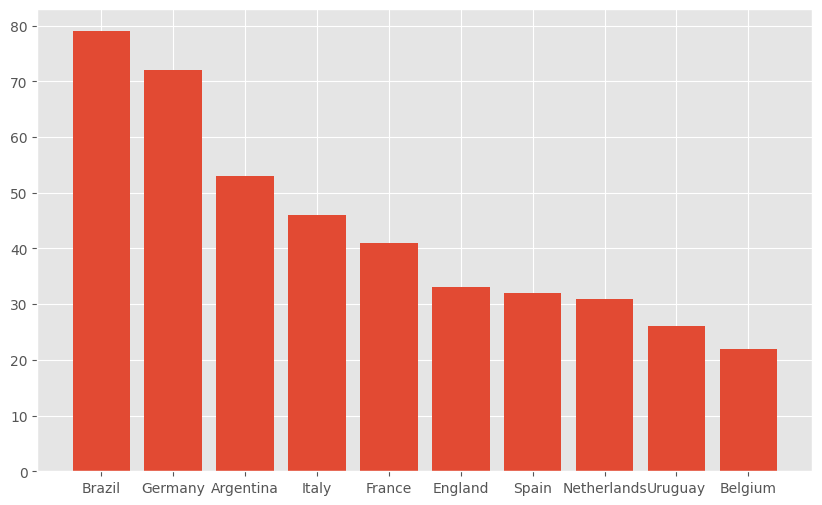

In [14]:
top_10 = merged_data['winner'].where(merged_data['winner'] != 'Tie').value_counts().head(10)
x = top_10.index
y = top_10.values
plt.figure(figsize=(10, 6))
plt.bar(x, y)
plt.show()

In [15]:
pais = top_10.index
partidos_ganados = top_10.values
for i in range(len(pais)):
  print(pais[i], ': ', partidos_ganados[i])

Brazil :  79
Germany :  72
Argentina :  53
Italy :  46
France :  41
England :  33
Spain :  32
Netherlands :  31
Uruguay :  26
Belgium :  22


In [16]:
# Agregando una fila date_year para filtrar los datos por mundial
# Adding a date_year row to filter the data by worldwide

date_year = []
for i in range(len(merged_data)):
  date_year.append(merged_data['date'][i][:4])

merged_data = merged_data.assign(date_year = date_year)
merged_data

,date,home_team,away_team,home_score,away_score,city,country,winner,date_year
0,1930-07-13,Belgium,United States,0,3,Montevideo,Uruguay,United States,1930
1,1930-07-13,France,Mexico,4,1,Montevideo,Uruguay,France,1930
2,1930-07-14,Brazil,Yugoslavia,1,2,Montevideo,Uruguay,Yugoslavia,1930
3,1930-07-14,Peru,Romania,1,3,Montevideo,Uruguay,Romania,1930
4,1930-07-15,Argentina,France,1,0,Montevideo,Uruguay,Argentina,1930
...,...,...,...,...,...,...,...,...,...
959,2022-12-10,England,France,1,2,Al Khor,Qatar,France,2022
960,2022-12-13,Argentina,Croatia,3,0,Lusail,Qatar,Argentina,2022
961,2022-12-14,France,Morocco,2,0,Al Khor,Qatar,France,2022
962,2022-12-17,Croatia,Morocco,2,1,Al Rayyan,Qatar,Croatia,2022


In [17]:
merged_data[merged_data.winner == 'Tie']

,date,home_team,away_team,home_score,away_score,city,country,winner,date_year
29,1934-05-31,Italy,Spain,1,1,Florence,Italy,Tie,1934
35,1938-06-04,Germany,Switzerland,1,1,Paris,France,Tie,1938
37,1938-06-05,Cuba,Romania,3,3,Toulouse,France,Tie,1938
44,1938-06-12,Brazil,Czechoslovakia,1,1,Bordeaux,France,Tie,1938
58,1950-06-28,Brazil,Switzerland,2,2,São Paulo,Brazil,Tie,1950
...,...,...,...,...,...,...,...,...,...
917,2022-11-25,Netherlands,Ecuador,1,1,Al Rayyan,Qatar,Tie,2022
919,2022-11-25,England,United States,0,0,Al Khor,Qatar,Tie,2022
925,2022-11-27,Spain,Germany,1,1,Al Khor,Qatar,Tie,2022
928,2022-11-28,Cameroon,Serbia,3,3,Al Wakrah,Qatar,Tie,2022


# 2. Cantidad de partidos empatados en cada mundial

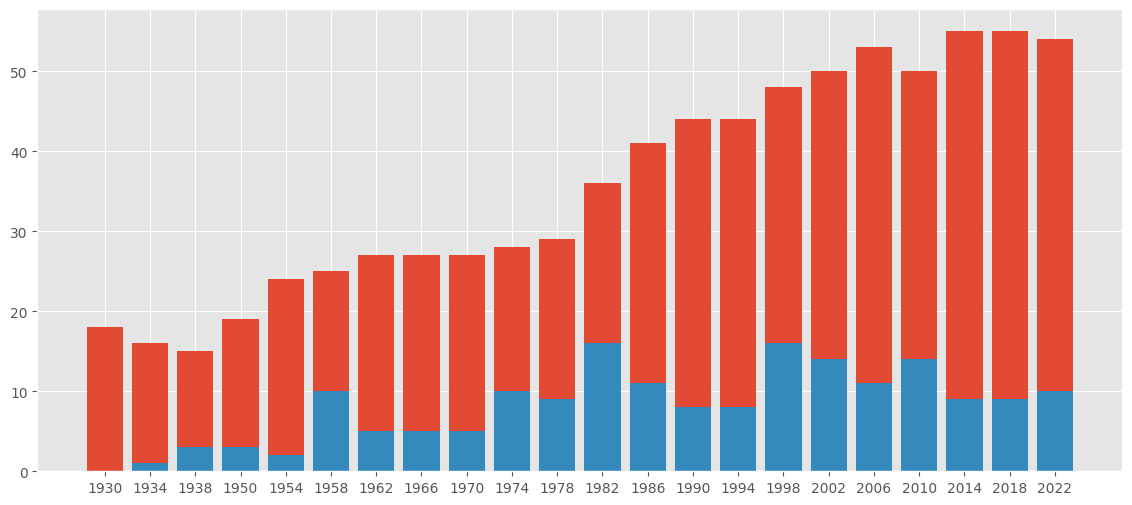

In [18]:
matchs_tie = merged_data['date_year'].where(merged_data.winner == 'Tie').value_counts().sort_index()
matchs_without_tie = merged_data.date_year.where(merged_data.winner != 'Tie').value_counts().sort_index()
x = matchs_tie.index
y = matchs_tie.values
x1 = matchs_without_tie.index
y1 = matchs_without_tie.values
plt.figure(figsize = (14,6))
plt.bar(x1,y1)
plt.bar(x,y)
plt.show()


In [19]:
print("Tied matchs")
matchs_tie

Tied matchs


1934     1
1938     3
1950     3
1954     2
1958    10
1962     5
1966     5
1970     5
1974    10
1978     9
1982    16
1986    11
1990     8
1994     8
1998    16
2002    14
2006    11
2010    14
2014     9
2018     9
2022    10
Name: date_year, dtype: int64

In [20]:
cant_goals = merged_data.assign(total_goals = merged_data.away_score + merged_data.home_score)
cant_goals

,date,home_team,away_team,home_score,away_score,city,country,winner,date_year,total_goals
0,1930-07-13,Belgium,United States,0,3,Montevideo,Uruguay,United States,1930,3
1,1930-07-13,France,Mexico,4,1,Montevideo,Uruguay,France,1930,5
2,1930-07-14,Brazil,Yugoslavia,1,2,Montevideo,Uruguay,Yugoslavia,1930,3
3,1930-07-14,Peru,Romania,1,3,Montevideo,Uruguay,Romania,1930,4
4,1930-07-15,Argentina,France,1,0,Montevideo,Uruguay,Argentina,1930,1
...,...,...,...,...,...,...,...,...,...,...
959,2022-12-10,England,France,1,2,Al Khor,Qatar,France,2022,3
960,2022-12-13,Argentina,Croatia,3,0,Lusail,Qatar,Argentina,2022,3
961,2022-12-14,France,Morocco,2,0,Al Khor,Qatar,France,2022,2
962,2022-12-17,Croatia,Morocco,2,1,Al Rayyan,Qatar,Croatia,2022,3


# 3. Cantidad de goles por mundial


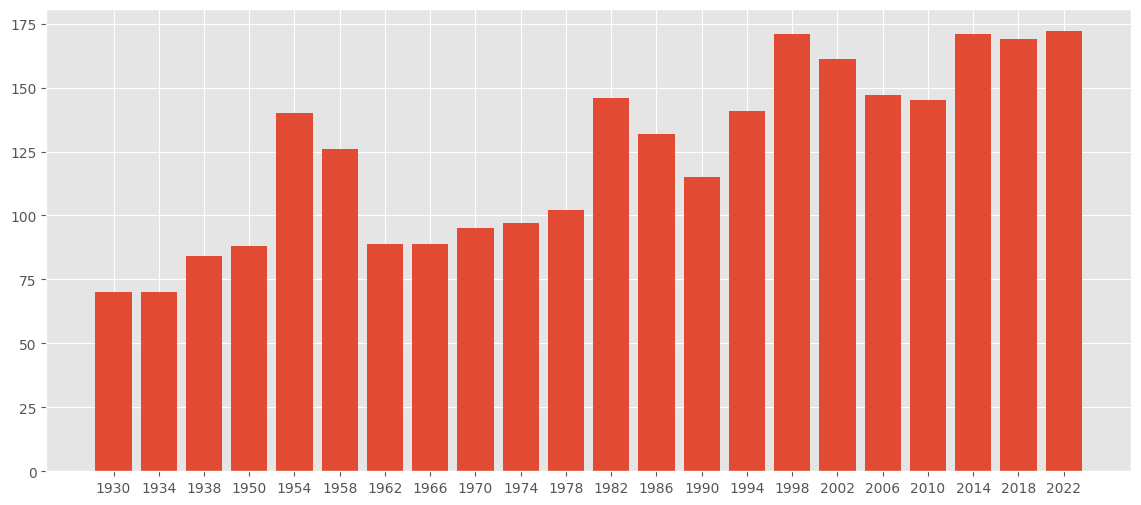

In [21]:
goals_by_year = cant_goals.groupby(['date_year'])['total_goals'].agg('sum')
x = goals_by_year.index
y = goals_by_year.values
plt.figure(figsize=(14, 6))
plt.bar(x, y)
plt.show()

# 4. Cantidad de partidos por mundial


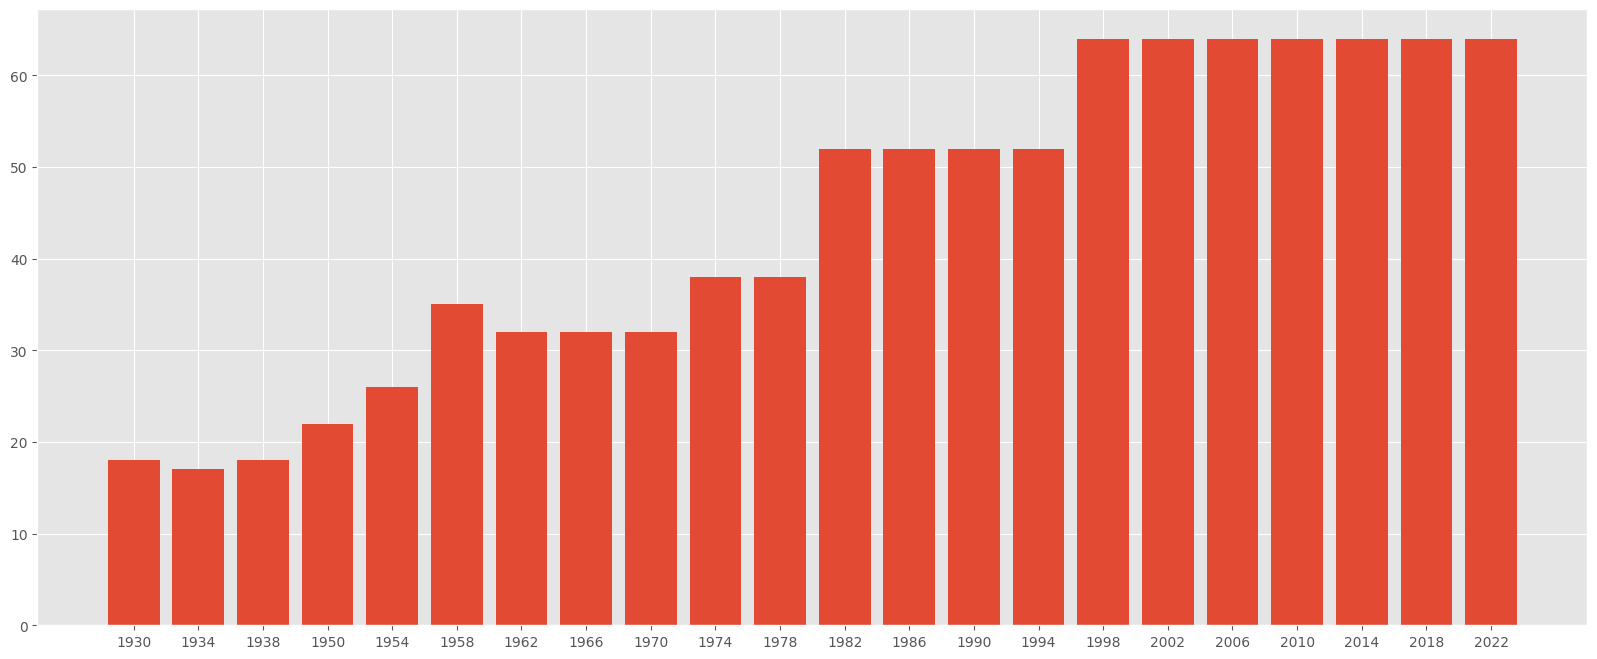

In [22]:
matchs_by_year = cant_goals.groupby(['date_year'])['date_year'].agg('count')
x = matchs_by_year.index
y = matchs_by_year.values
plt.figure(figsize = (20,8))
plt.bar(x,y)
plt.show()

In [23]:
for i in range(len(x)):
  print(x[i], ": ", y[i], " goals")

1930 :  18  goals
1934 :  17  goals
1938 :  18  goals
1950 :  22  goals
1954 :  26  goals
1958 :  35  goals
1962 :  32  goals
1966 :  32  goals
1970 :  32  goals
1974 :  38  goals
1978 :  38  goals
1982 :  52  goals
1986 :  52  goals
1990 :  52  goals
1994 :  52  goals
1998 :  64  goals
2002 :  64  goals
2006 :  64  goals
2010 :  64  goals
2014 :  64  goals
2018 :  64  goals
2022 :  64  goals


# 5.Promedio de Goles por cada mundial


In [24]:
avg = map(lambda x, y: round(x/y, 2), goals_by_year, matchs_by_year)
avg = list(avg)
for i in range(len(avg)):
  print(x[i], ": ", avg[i], " average goals")

1930 :  3.89  average goals
1934 :  4.12  average goals
1938 :  4.67  average goals
1950 :  4.0  average goals
1954 :  5.38  average goals
1958 :  3.6  average goals
1962 :  2.78  average goals
1966 :  2.78  average goals
1970 :  2.97  average goals
1974 :  2.55  average goals
1978 :  2.68  average goals
1982 :  2.81  average goals
1986 :  2.54  average goals
1990 :  2.21  average goals
1994 :  2.71  average goals
1998 :  2.67  average goals
2002 :  2.52  average goals
2006 :  2.3  average goals
2010 :  2.27  average goals
2014 :  2.67  average goals
2018 :  2.64  average goals
2022 :  2.69  average goals


In [25]:
import plotly.express as px
year = list(matchs_by_year.index) # Años de las copas mundiales
goals = list(goals_by_year.values) # Cantidad de goles de cada mundial
fig = px.line(x = year, y = avg)
fig.show()